In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-22 01:11:33.355017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 01:11:33.355074: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load data and subset

<Item title:"SAC_Annual_Plant_Health_Assessment" type:Feature Layer Collection owner:Anooshi>
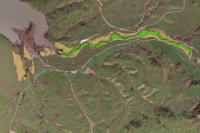

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('f53b7bb25a39449e8dd5fd92af213745')

data = output['data0']
feature_service = output['feature_service']

In [3]:
# Subset data for desired year.
data.rename(columns={"SurveyDate": "Observation_Date"}, inplace=True)
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()

Start Year? (YYYY) 

# QAQC

In [0]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

In [0]:
validate_domains(feature_service)


In [0]:
# QAQC Find blank entries in specific columns

find_blank_entries(data,['BHRSite', 'HealthRank','Cankers', 'Comments', 'DeadLeaves',
       'DeadPathog', 'DeerBrow', 'Depredated', 'Dormant', 'EnteringDo',
       'ExcptRob', 'GlobalID', 'Habitat', 'InsectBrow',
       'InsectInfe', 'LeafDiebac', 'LeafSpots', 'LeavesChlo', 'MainStmDeR',
       'OBJECTID', 'Oozing', 'PlantStunt', 'PotentialP', 'PrematureL',
       'RodentBrow', 'SHAPE', 'ShootBranc', 'StemDiebac', 
    'Surveyor2', 'Vounteers', 'Wilting'])


In [0]:
# QAQC Find white spaces
QAQC_whitespace(data, ['Comments'])

In [0]:
data.columns

In [0]:
QAQC_plot(sub,['Habitat', 'BHRSite', 'Observation_Date', 'Surveyor1',
       'Surveyor2', 'AliveDead', 'HealthRank', 'ExcptRob', 'PlantStunt',
       'EnteringDo', 'Dormant', 'MainStmDeR', 'StemDiebac', 'ShootBranc',
       'LeafDiebac', 'LeavesChlo', 'LeafSpots', 'DeadLeaves', 'PrematureL',
       'Wilting', 'Cankers', 'Oozing', 'PotentialP', 'InsectInfe', 'DeerBrow',
       'RodentBrow', 'InsectBrow', 'Depredated', 'DeadPathog',
       'Species','Vounteers'])

In [0]:
compare_years_catagorical(data,['Surveyor1', 'Species', 'AliveDead', 'HealthRank'], '2019', '2020')

In [0]:
compare_surveyors(sub, 'HealthRank', 'Surveyor1', 5)

In [0]:
# Check that Alive entries have no blank health rankings

alive_R = data.loc[(data.AliveDead == 'Alive') & (data.HealthRank.isna()),]

if not alive_R.empty:
    print('ERROR: Alive entries should not have a blank value on HealthRank')
    display(alive_R)
else:
    print('No issues')


In [0]:
# Check that Dead Entries have a blank health ranking.

dead_R = data.loc[(data.AliveDead == 'Dead') & (data.HealthRank.notna()),]

if not dead_R.empty:
    print('ERROR: Dead entries should have a blank value on HealthRank')
    display(dead_R)
else:
    print('No issues')

In [0]:
QAQC_attachment_filenames(feature_service)

In [0]:
#Compare columns of health to health ranking (incomplete)

#Create emtpy dataframe
results = pd.DataFrame()

#Loop through each column
for col in ['PlantStunt','MainStmDeR','StemDiebac','ShootBranc','LeafDiebac','LeavesChlo','LeafSpots','DeadLeaves','PrematureL','Wilting','Cankers','Oozing','PotentialP','InsectInfe', 'DeadPathog', 'DeerBrow', 'RodentBrow', 'InsectBrow']:
    
    #If the column is light/moderate/heavy type
    if col in ['DeerBrow','RodentBrow','InsectBrow']:
        #Replace light/moderate/heavy with numbers, and store into results dataframe
        results[col] = sub.loc[:,col].replace({'Light':.5,'Moderate':.75, 'Heavy':1})
    
    #Else (yes type columns)
    else:
        results[col] = sub.loc[:,col] == 'Yes'

#sum along rows
total = results.sum(axis=1)

print(total)

In [2]:
data.head()

NameError: name 'data' is not defined

In [24]:
field_order = ([
    'OBJECTID', 
       'Habitat', 
       'BHRSite', 
       'Observation_Date', 
       'Surveyor1',
       'Surveyor2',
       'Species', 
       'AliveDead', 
       'HealthRank', 
       'ExcptRob', 
       'PlantStunt',
       'EnteringDo', 
       'Dormant', 
       'MainStmDeR', 
       'StemDiebac', 
       'ShootBranc',
       'LeafDiebac', 
       'LeavesChlo', 
       'LeafSpots', 
       'DeadLeaves', 
       'PrematureL',
       'Wilting', 
       'Cankers', 
       'Oozing', 
       'PotentialP',         
       'InsectInfe', 
       'DeerBrow',
       'RodentBrow', 
       'InsectBrow', 
       'Depredated', 
       'DeadPathog', 
       'Vounteers', 
       'Comments', 
       'GlobalID', 
       'SHAPE'
])

In [1]:
data_to_export = data.exclude('Year','month')

NameError: name 'data' is not defined

In [25]:
export_data_deliverable(data, feature_service, field_order,file_name='SAC_Annual_Plant_Health_Monitoring')

No Related Table Found
Exported to Outputs/SAC_Annual_Plant_Health_Monitoring_Data_20210921.xlsx
